In [1]:
# pip install openpyxl wordcloud konlpy

In [2]:
# 나눔고딕 설치
# !sudo apt-get install fonts-nanum

In [3]:
import openpyxl
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import random

In [4]:
# 엑셀 파일 경로 설정
excel_file_path = "/content/drive/MyDrive/11조/총_민원_데이터.xlsx"
sheet_name = "Sheet1"  # 시트 이름

In [5]:
# 엑셀 파일 로드
wb = openpyxl.load_workbook(excel_file_path)
sheet = wb[sheet_name]

In [6]:
# 엑셀 시트에서 텍스트 데이터 추출 및 형태소 분석
text_data = ""
okt = Okt()
for row in sheet.iter_rows(values_only=True):
    for cell in row:
        if isinstance(cell, str):
            text_data += cell + " "

In [7]:
# 제거할 단어 리스트
words_to_remove = ['미모',"미모","마음","상태","저희","한국","아이","가정","대하", "따라서", "하라","나마", "자서", "최금", "가가", "필합", "루어", "대서", "딸아", "주자", "래서", "가나","가라","야합","민신","개방","가족","미모","런데","문","혼","대한","때","급","점","도","생","경우","습","한부모","미혼모", "것","때문","이","제대로","못","중","거나","가운데","등","육박","및","배","가량","속","수","감","위","시점","대효","가정은","세","미만","보통","상위","부분","개월","간의","마치","후","아무","동안","정규","내내","다음","또한","의","오히려","더","단지","임","정인","로서","고려","유지","시","해","줄","전모","각","층","료","급시","정말","게다가","일부러","이용도","란","지금","줄줄","비","국","명","이상인","무조건","왜","구분","이하","푼","요","고작","조금","외제차","당장","정이","이상","마찬가지","이구","달라","간곡","것를","좀","진정","무엇","파악","화가","이드","주어","밑","단","명도","과연","부여","주지","저","그","과","제","바로","치가","처럼","지난","뒤","위해","짛","안","테","쪽","가지","정지원","더욱","일인","랴짐","꼭","고본","가액","다","구가","이경제","다른","다른","누군가","통","이기","등등","비단","뭔가","무언가","라며","낼","고","일이","정","시한","로부터","인","월","연","초생","를","미보","유","기타","만큼","선","여느","도모","일도","더군다나","치","제외","함","좀더","나은","뿐","각종","각층","자년","관련","타","완료","그러케","도대체","거기","팔지","이제","그것","듯이","을해","한참","광","축","에마","채감","써비","스","전부","실","이소리","반드시","적","또","즉시","진","건","부부인","부청","부로","만들기","어쩌면","당햐","언제","색","북","준","성행","만약","곳","괜잖겠","심지어","부터","어쩐지","게","막","자체","조","육모","여러","더구나","최대","혼모","선뜻","그냥","통한","설령","대세","율","경상남도교육청","수가","활","창","두","잡","안이","번","전","것이므","거","살때","식이","일로","낼때","내지","이건","뭐"]  # 필요한 단어로 수정

In [8]:
# 제거할 단어들을 반복하여 삭제
for word in words_to_remove:
    text_data = text_data.replace(word, "")

In [9]:
# 형태소 분석 후 명사만 추출
nouns = okt.nouns(text_data)

In [10]:
# 한 글자 단어 제거
nouns = [word for word in nouns if len(word) > 1 or word=="차"]

In [11]:
# 빈도수 계산
noun_counter = Counter(nouns)

In [12]:
noun_counter

Counter({'학업': 50,
         '포기': 54,
         '환경': 104,
         '학교': 241,
         '자신': 57,
         '농어촌': 12,
         '지역': 37,
         '손길': 15,
         '미지': 24,
         '학년': 80,
         '기피': 8,
         '보가': 10,
         '졸업': 37,
         '분리': 6,
         '부응': 6,
         '자녀': 492,
         '부모': 383,
         '보호': 78,
         '교육': 181,
         '혜택': 574,
         '상황': 195,
         '나나': 12,
         '여기': 23,
         '농촌': 2,
         '가출': 10,
         '불만': 10,
         '분노': 2,
         '슷했': 2,
         '가난': 13,
         '외로움': 6,
         '좌절': 10,
         '양하': 4,
         '직접': 44,
         '관심': 34,
         '마련': 61,
         '현황': 232,
         '개방': 228,
         '군대': 37,
         '녀온': 5,
         '현재': 271,
         '여성': 121,
         '라면': 26,
         '학기': 26,
         '차': 260,
         '상계': 31,
         '록금': 10,
         '장학금': 45,
         '남성': 41,
         '군입대': 5,
         '복학': 26,
         '형편': 37,
         '부담': 85,
       

In [13]:
# 워드 클라우드 모양 이미지 파일
mask_image = np.array(Image.open("/content/drive/MyDrive/11조/하트.png"))

In [14]:
# 워드 클라우드 생성
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = random.randint(0, 360)
    s = random.randint(80, 100)
    l = random.randint(50, 80)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(font_path="NanumGothic.ttf", background_color=None, mode="RGBA", mask=mask_image,
                      color_func=random_color_func).generate_from_frequencies(noun_counter)


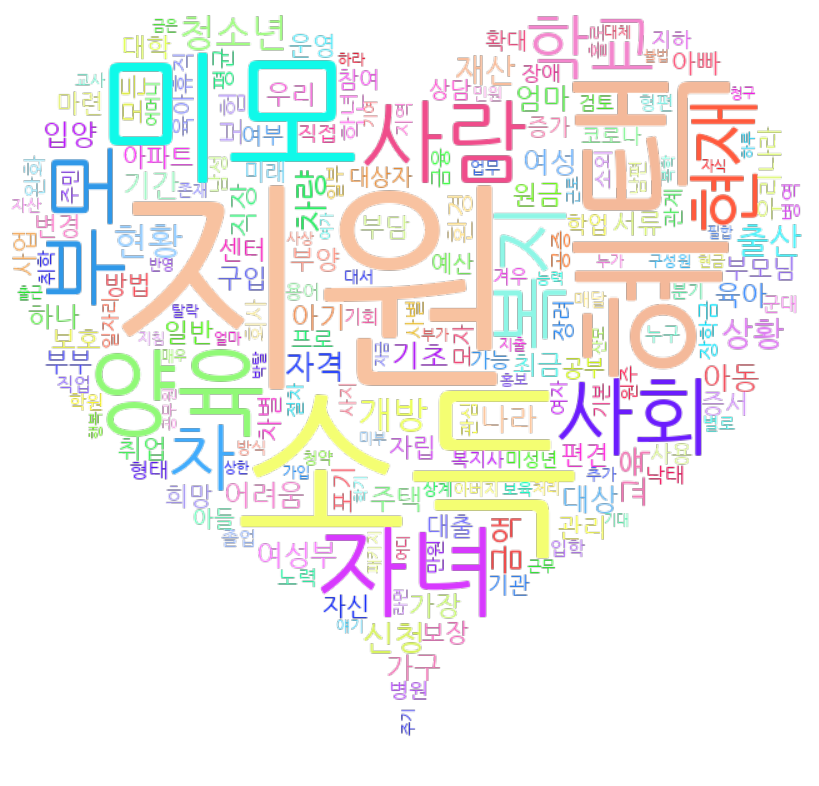

In [15]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

In [16]:
# 워드 클라우드 이미지 파일로 저장
# wordcloud_image_path = "wordcloud.png"
# plt.savefig(wordcloud_image_path, format="png")


In [17]:
# 워드 클라우드 이미지 보여주기
# plt.show()